In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import tensorflow as tf
from tensorflow import keras

import utils

plt.rcParams['figure.figsize'] = (25, 8)
plt.rcParams["figure.autolayout"] = True

# Function

In [2]:
def show(chroma, label):
  print(label)
  plt.imshow(chroma)
  plt.axis('off')

In [3]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

In [4]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

# Download dataset

ดาวน์โหลดชุดข้อมูล chroma (ไฟล์ chroma.npy) ได้ที่ : https://drive.google.com/drive/folders/1ELZ49c3ArRA8uJ18U9WSkVPEltu5YN1q

In [5]:
classes = ['acoustic',
 'folk',
 'alternative/indie',
 'blues',
 'jazz',
 'classical',
 'opera',
 'club',
 'instrumental',
 'country',
 'techno',
 'electronic',
 'house',
 'hip-hop',
 'rock',
 'metal',
 'pop',
 'r&b/soul',
 'reggae',
 'latin',
 'industrial']

In [6]:
print('classes :')
pd.DataFrame(classes)

classes :


,0
0,acoustic
1,folk
2,alternative/indie
3,blues
4,jazz
5,classical
6,opera
7,club
8,instrumental
9,country


In [7]:
num_classes = len(classes)

In [8]:
# หลังจากที่ดาวน์โหลดชุดข้อมูลแล้ว (ไฟล์ chroma.npy) ให้ย้ายไฟล์ที่ดาวน์โหลดไปใสไว้ใน folder ชื่อ data_preprocess (ภายใน floder นั้นมีไฟล์ชุดข้อมูล Label อยู่แล้ว)

X_dataset = np.load('./data_preprocess/chroma.npy')
y_dataset = np.load('./data_preprocess/y.npy')

In [9]:
y_dataset = tf.keras.utils.to_categorical(y_dataset, num_classes=num_classes)

In [10]:
X_dataset = X_dataset.reshape((*X_dataset.shape,1))

In [11]:
X_dataset.shape, y_dataset.shape

((15120, 12, 1200, 1), (15120, 21))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, stratify=y_dataset)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, stratify=Y_train)

In [13]:
X_train.shape[0] + X_val.shape[0] + X_test.shape[0]

15120

In [14]:
X_train.shape[0], X_val.shape[0], X_test.shape[0]

(9072, 2268, 3780)

# Build CNN Model

In [15]:
import tensorflow as tf
from keras import backend as K
from keras import layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras import regularizers

In [16]:
input_shape=X_train.shape[1:]
CNNmodel = Sequential()
CNNmodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
CNNmodel.add(MaxPooling2D(pool_size=(2, 2)))

CNNmodel.add(Conv2D(32, (3, 3), activation='relu',))
CNNmodel.add(MaxPooling2D(pool_size=(2, 2)))

CNNmodel.add(Dropout(0.2))
CNNmodel.add(Flatten())
CNNmodel.add(Dense(64, activation='relu'))
CNNmodel.add(Dropout(0.4))
CNNmodel.add(Dense(32, activation='relu'))
CNNmodel.add(Dense(num_classes, activation='softmax'))

CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 1198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 599, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 597, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 298, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 1, 298, 32)        0         
                                                                 
 flatten (Flatten)           (None, 9536)              0

In [17]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

CNNmodel.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [18]:
history = CNNmodel.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
284/284 [==============================] - 8s 19ms/step - loss: 3.0043 - accuracy: 0.0662 - val_loss: 2.9139 - val_accuracy: 0.0930
Epoch 2/10
284/284 [==============================] - 5s 17ms/step - loss: 2.8575 - accuracy: 0.0968 - val_loss: 2.7839 - val_accuracy: 0.1102
Epoch 3/10
284/284 [==============================] - 5s 17ms/step - loss: 2.7519 - accuracy: 0.1209 - val_loss: 2.7502 - val_accuracy: 0.1257
Epoch 4/10
284/284 [==============================] - 5s 17ms/step - loss: 2.6673 - accuracy: 0.1553 - val_loss: 2.6543 - val_accuracy: 0.1592
Epoch 5/10
284/284 [==============================] - 5s 16ms/step - loss: 2.5580 - accuracy: 0.1877 - val_loss: 2.5941 - val_accuracy: 0.1728
Epoch 6/10
284/284 [==============================] - 5s 17ms/step - loss: 2.4192 - accuracy: 0.2295 - val_loss: 2.5870 - val_accuracy: 0.1781
Epoch 7/10
284/284 [==============================] - 5s 17ms/step - loss: 2.2704 - accuracy: 0.2708 - val_loss: 2.5822 - val_accuracy: 0.1843

In [19]:
CNNmodel.evaluate(X_test, Y_test)

119/119 [==============================] - 1s 6ms/step - loss: 2.7687 - accuracy: 0.1995


[2.7686927318573, 0.1994708925485611]

In [20]:
pred = CNNmodel.predict(X_test)

119/119 [==============================] - 1s 4ms/step


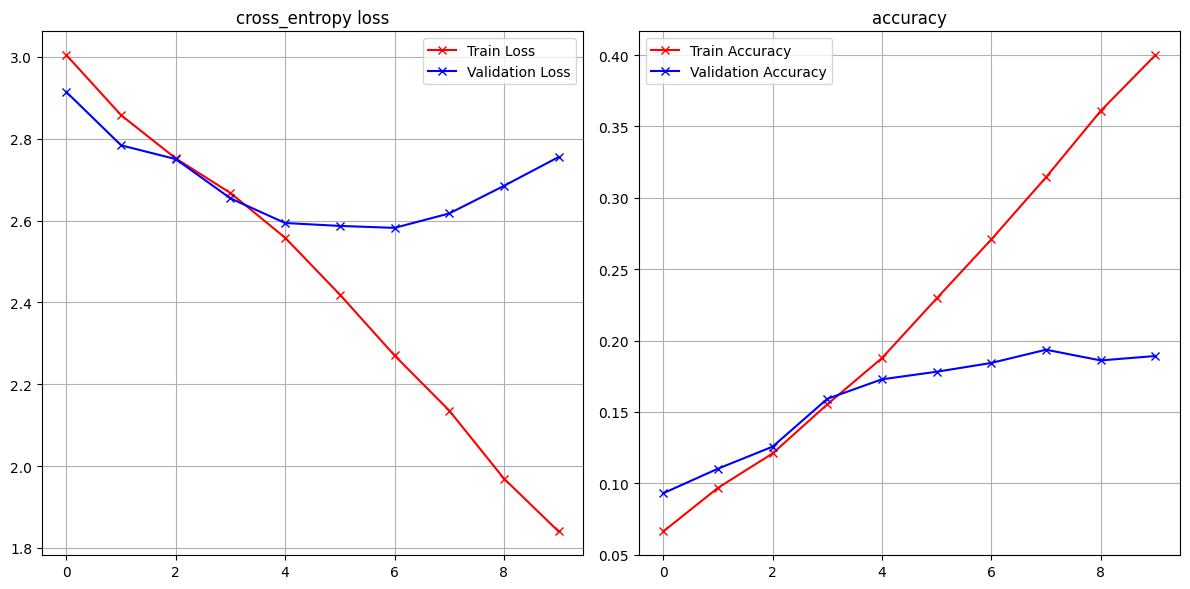

In [21]:
plot_loss_accuracy(history)

In [26]:
CNNmodel_2 = Sequential()
CNNmodel_2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
# CNNmodel_2.add(layers.MaxPooling2D((2, 2)))
CNNmodel_2.add(layers.Dropout(0.2))
CNNmodel_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# CNNmodel_2.add(layers.MaxPooling2D((2, 2)))
CNNmodel_2.add(layers.Dropout(0.2))
CNNmodel_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
CNNmodel_2.add(layers.Flatten())
CNNmodel_2.add(layers.Dense(64, activation='relu'))
CNNmodel_2.add(layers.Dropout(0.2))
CNNmodel_2.add(layers.Dense(32, activation='relu'))
CNNmodel_2.add(layers.Dense(num_classes, activation='softmax'))

CNNmodel_2.summary()

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)

CNNmodel_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 12, 259, 32)       320       
                                                                 
 dropout_8 (Dropout)         (None, 12, 259, 32)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 259, 64)       18496     
                                                                 
 dropout_9 (Dropout)         (None, 12, 259, 64)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 259, 64)       36928     
                                                                 
 flatten_3 (Flatten)         (None, 198912)            0         
                                                                 
 dense_9 (Dense)             (None, 64)               